**1. Use the Cleaned Titanic Dataset**

In [ ]:
# Load the cleaned Titanic dataset
import pandas as pd
titanic_cleaned = pd.read_csv('/content/cleaned_titanic.csv')

**2. Perform the Following EDA Tasks**

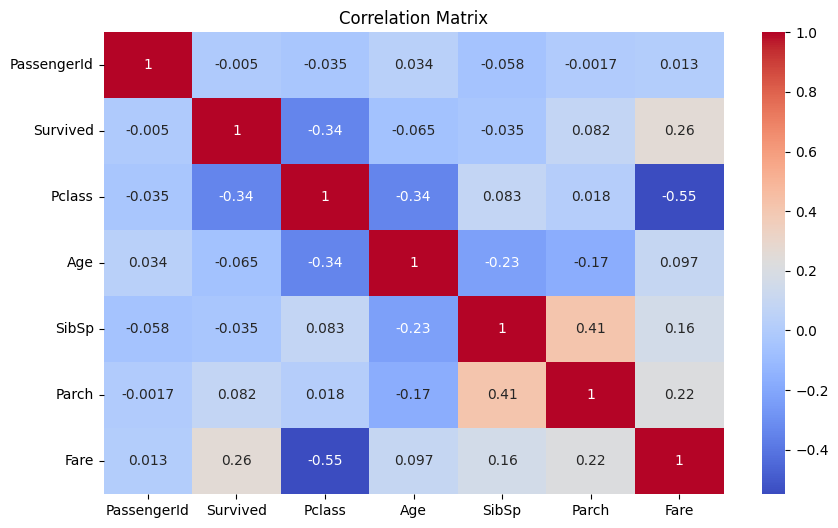

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64
Age
(0, 12]      0.383146
(12, 18]          NaN
(18, 60]          NaN
(60, 100]         NaN
Name: Survived, dtype: float64
Chi-Square Test: Chi2=260.71702016732104, p-value=1.1973570627755645e-58


<ipython-input-2-6c11a67fc76d>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_cleaned.groupby(pd.cut(titanic_cleaned['Age'], bins=[0, 12, 18, 60, 100]))['Survived'].mean())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the correlation matrix
#plt.figure(figsize=(10, 6))
#sns.heatmap(titanic_cleaned.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()


# Select only the numeric columns
numeric_columns = titanic_cleaned.select_dtypes(include=['number'])

# Create the heatmap for the correlation matrix using only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Survival rate by passenger class
print(titanic_cleaned.groupby('Pclass')['Survived'].mean())

# Survival rate by gender
print(titanic_cleaned.groupby('Sex_male')['Survived'].mean())

# Survival rate by age group
print(titanic_cleaned.groupby(pd.cut(titanic_cleaned['Age'], bins=[0, 12, 18, 60, 100]))['Survived'].mean())


from scipy.stats import chi2_contingency

# Creating the contingency table for gender and survival
gender_contingency = pd.crosstab(titanic_cleaned['Sex_male'], titanic_cleaned['Survived'])

# Performing the Chi-Square Test
chi2, p, dof, _ = chi2_contingency(gender_contingency)

# Output the result of the chi-square test
print(f"Chi-Square Test: Chi2={chi2}, p-value={p}")